<a href="https://colab.research.google.com/github/meriemdouider1/Recursive_Feature_Elimination_-RFE-/blob/main/RFECV15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
Cl = '/content/cs-longia.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-5.366667,35

In [4]:
X = data.loc[:, data.columns != 'Cs_longia']
Y = data.Cs_longia

In [5]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-

In [6]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
249    1
250    1
251    1
252    1
253    1
Name: Cs_longia, Length: 254, dtype: int64

In [7]:
def tp(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)    

In [8]:
 from sklearn.feature_selection import SelectFromModel,RFECV
 from sklearn.model_selection import StratifiedKFold
 from sklearn.neural_network import MLPClassifier

# xgboost

In [14]:
rfecv1= RFECV(XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),cv=StratifiedKFold(15))
rfecv1.fit(X,Y)
# check the support
rfecv1.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [15]:
# name wise features and count
feature_selected1 =  X.columns[rfecv1.get_support()]
feature_selected1

Index(['Amp3_TempJ', 'Var_EVI'], dtype='object')

In [16]:
 x_rfe1=X[feature_selected1]

In [17]:
 x_rfe1

,Amp3_TempJ,Var_EVI
0,7,1
1,31,0
2,31,0
3,23,0
4,33,35
...,...,...
249,5,47
250,1,7
251,6,70
252,0,40


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

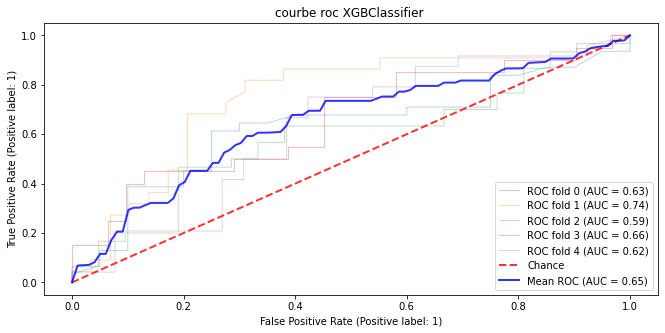

Accuracy: [0.60784314 0.64705882 0.54901961 0.58823529 0.62      ]
moy_accuracy: 0.60
precision: [0.67741935 0.55555556 0.61290323 0.47826087 0.6       ]
moy_precision: 0.58
sensibilité : [0.67741935 0.90909091 0.63333333 0.55       0.625     ]
moy_sensibilité: 0.68
spécificité : [0.5        0.44827586 0.42857143 0.61290323 0.61538462]
moy_spécificité: 0.52
MCC : [0.17741935 0.38844329 0.062402   0.15983894 0.24019223]
MCC: 0.21
balanced_accuracy : [0.58870968 0.67868339 0.53095238 0.58145161 0.62019231]
balanced_accuracy: 0.60
roc_auc : [0.62903226 0.74451411 0.58650794 0.65806452 0.625     ]
roc_auc: 0.65
cohen_kappa_scorec : [0.17741935 0.33187773 0.06235012 0.15868028 0.24      ]
cohen_kappa_scorec: 0.19
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

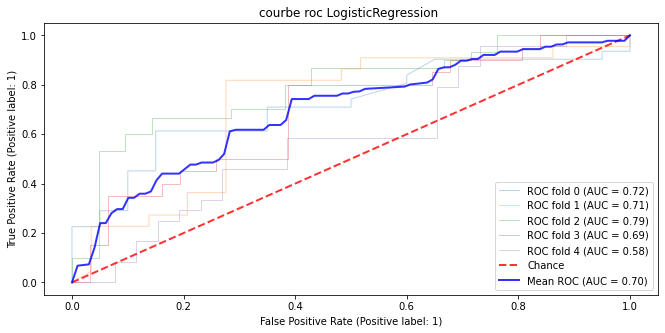

Accuracy: [0.70588235 0.66666667 0.7254902  0.62745098 0.56      ]
moy_accuracy: 0.66
precision: [0.86363636 0.58064516 0.83333333 0.52631579 0.53846154]
moy_precision: 0.67
sensibilité : [0.61290323 0.81818182 0.66666667 0.5        0.58333333]
moy_sensibilité: 0.64
spécificité : [0.85       0.55172414 0.80952381 0.70967742 0.53846154]
moy_spécificité: 0.69
MCC : [0.45632652 0.37523714 0.46953014 0.21173649 0.12179487]
MCC: 0.33
balanced_accuracy : [0.73145161 0.68495298 0.73809524 0.60483871 0.56089744]
balanced_accuracy: 0.66
roc_auc : [0.71612903 0.71238245 0.79047619 0.68709677 0.58012821]
roc_auc: 0.70
cohen_kappa_scorec : [0.42867812 0.35250187 0.456621   0.21155411 0.12140575]
cohen_kappa_scorec: 0.31
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

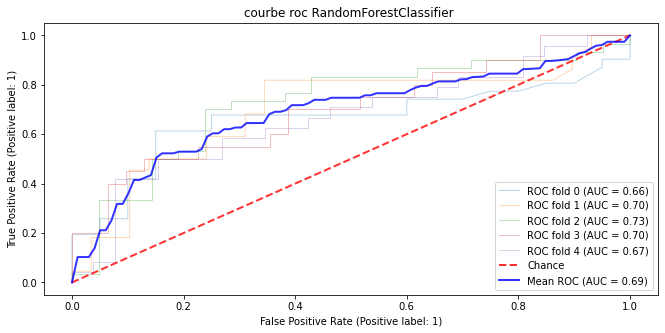

Accuracy: [0.66666667 0.7254902  0.64705882 0.68627451 0.64      ]
moy_accuracy: 0.67
precision: [0.79166667 0.64285714 0.8        0.625      0.625     ]
moy_precision: 0.70
sensibilité : [0.61290323 0.81818182 0.53333333 0.5        0.625     ]
moy_sensibilité: 0.62
spécificité : [0.75       0.65517241 0.80952381 0.80645161 0.65384615]
moy_spécificité: 0.73
MCC : [0.35497615 0.47114401 0.34561106 0.32245101 0.27884615]
MCC: 0.35
balanced_accuracy : [0.68145161 0.73667712 0.67142857 0.65322581 0.63942308]
balanced_accuracy: 0.68
roc_auc : [0.65967742 0.69905956 0.72539683 0.6983871  0.66666667]
roc_auc: 0.69
cohen_kappa_scorec : [0.34168565 0.45827011 0.32       0.31772575 0.27884615]
cohen_kappa_scorec: 0.34
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

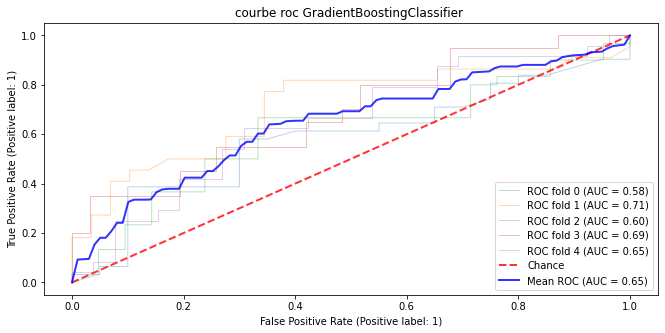

Accuracy: [0.54901961 0.68627451 0.56862745 0.62745098 0.64      ]
moy_accuracy: 0.61
precision: [0.63333333 0.60714286 0.68181818 0.52380952 0.63636364]
moy_precision: 0.62
sensibilité : [0.61290323 0.77272727 0.5        0.55       0.58333333]
moy_sensibilité: 0.60
spécificité : [0.45       0.62068966 0.66666667 0.67741935 0.69230769]
moy_spécificité: 0.62
MCC : [0.062402   0.39157995 0.16561844 0.22560722 0.27742513]
MCC: 0.22
balanced_accuracy : [0.53145161 0.69670846 0.58333333 0.61370968 0.63782051]
balanced_accuracy: 0.61
roc_auc : [0.58387097 0.71081505 0.60396825 0.68709677 0.64903846]
roc_auc: 0.65
cohen_kappa_scorec : [0.06235012 0.38088012 0.15765766 0.22541966 0.27652733]
cohen_kappa_scorec: 0.22
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

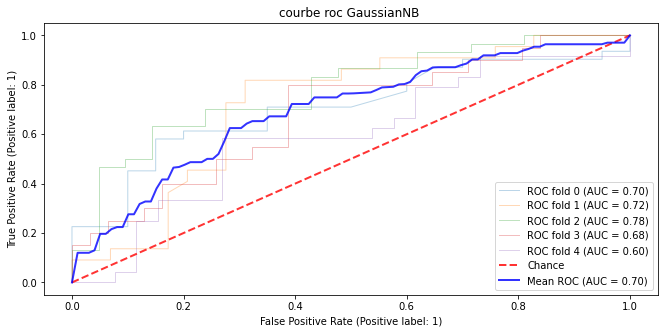

Accuracy: [0.68627451 0.56862745 0.70588235 0.64705882 0.54      ]
moy_accuracy: 0.63
precision: [0.75862069 0.5        0.77777778 0.53333333 0.51515152]
moy_precision: 0.62
sensibilité : [0.70967742 0.90909091 0.7        0.8        0.70833333]
moy_sensibilité: 0.77
spécificité : [0.65       0.31034483 0.71428571 0.5483871  0.38461538]
moy_spécificité: 0.52
MCC : [0.3545673  0.26423562 0.40849122 0.34561106 0.09802893]
MCC: 0.29
balanced_accuracy : [0.67983871 0.60971787 0.70714286 0.67419355 0.54647436]
balanced_accuracy: 0.64
roc_auc : [0.70483871 0.71708464 0.78095238 0.68387097 0.59615385]
roc_auc: 0.70
cohen_kappa_scorec : [0.35340729 0.19971469 0.40559441 0.32       0.09162717]
cohen_kappa_scorec: 0.27
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

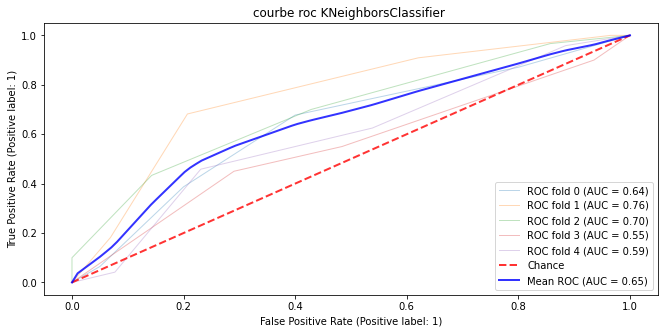

Accuracy: [0.54901961 0.74509804 0.60784314 0.60784314 0.62      ]
moy_accuracy: 0.63
precision: [0.75       0.71428571 0.8125     0.5        0.64705882]
moy_precision: 0.68
sensibilité : [0.38709677 0.68181818 0.43333333 0.45       0.45833333]
moy_sensibilité: 0.48
spécificité : [0.8        0.79310345 0.85714286 0.70967742 0.76923077]
moy_spécificité: 0.79
MCC : [0.19686483 0.47792749 0.30809653 0.16313462 0.24000187]
MCC: 0.28
balanced_accuracy : [0.59354839 0.73746082 0.6452381  0.57983871 0.61378205]
balanced_accuracy: 0.63
roc_auc : [0.63870968 0.75862069 0.69761905 0.55080645 0.59375   ]
roc_auc: 0.65
cohen_kappa_scorec : [0.16512456 0.47754137 0.26406926 0.16256158 0.23014587]
cohen_kappa_scorec: 0.26
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

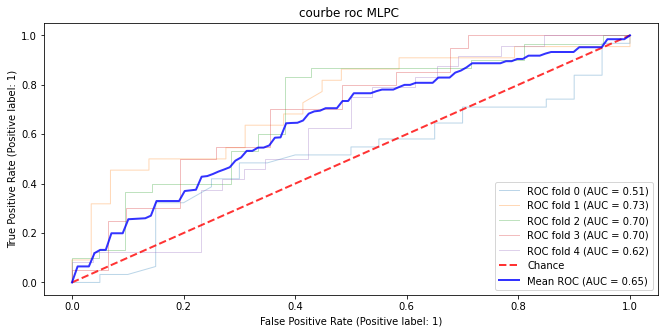

Accuracy: [0.45098039 0.56862745 0.43137255 0.70588235 0.6       ]
moy_accuracy: 0.55
precision: [0.58536585 0.57142857 0.625      0.43243243 0.625     ]
moy_precision: 0.57
sensibilité : [0.51612903 0.40909091 0.33333333 0.7        0.5       ]
moy_sensibilité: 0.49
spécificité : [0.95       0.72413793 0.33333333 0.83870968 0.69230769]
moy_spécificité: 0.71
MCC : [-0.20530596  0.11225203 -0.0093906   0.32245101  0.25189193]
MCC: 0.09
balanced_accuracy : [0.69596774 0.51645768 0.58095238 0.72822581 0.61057692]
balanced_accuracy: 0.63
roc_auc : [0.68064516 0.44984326 0.77936508 0.69032258 0.56410256]
roc_auc: 0.63
cohen_kappa_scorec : [0.17408907 0.24473889 0.22541966 0.28169014 0.10423453]
cohen_kappa_scorec: 0.21
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

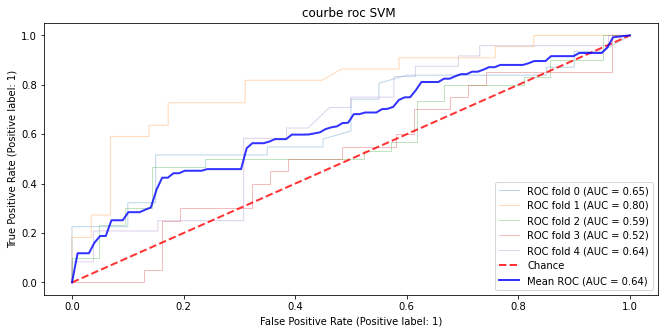

Accuracy: [0.56862745 0.68627451 0.60784314 0.56862745 0.6       ]
moy_accuracy: 0.61
precision: [0.66666667 0.6        0.75       0.45454545 0.58333333]
moy_precision: 0.61
sensibilité : [0.58064516 0.81818182 0.5        0.5        0.58333333]
moy_sensibilité: 0.60
spécificité : [0.55       0.5862069  0.76190476 0.61290323 0.61538462]
moy_spécificité: 0.63
MCC : [0.12779141 0.40694816 0.26400845 0.11129915 0.19871795]
MCC: 0.22
balanced_accuracy : [0.56532258 0.70219436 0.63095238 0.55645161 0.59935897]
balanced_accuracy: 0.61
roc_auc : [0.65322581 0.80485893 0.59206349 0.51612903 0.63942308]
roc_auc: 0.64
cohen_kappa_scorec : [0.12616822 0.38738739 0.24444444 0.11093502 0.19871795]
cohen_kappa_scorec: 0.21


In [18]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe1, Y)):
         clf.fit( x_rfe1.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe1.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe1, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe1, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe1, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe1, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe1, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# logistique

In [19]:
rfecv2 = RFECV(LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),cv=StratifiedKFold(15))
rfecv2.fit(X,Y)
# check the support
rfecv2.get_support()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/l

array([False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [20]:
# name wise features and count
feature_selected2 =  X.columns[rfecv2.get_support()]
feature_selected2

Index(['Volaille', 'Caprins', 'Ovins', 'Coniferes', 'ZoneAride', 'ZonePel',
       'Lesfeuillus', 'Caduc', 'Autres', 'Arbrisseau',
       ...
       'Tmax_Aout', 'Tmax_Sept', 'Tmax_Oct', 'Tmax_Nov', 'Tmax_Dec',
       'Tmin_Janv', 'Tmin_Mars', 'Tmin_Avril', 'Vent_Mars', 'Vent_Mai'],
      dtype='object', length=153)

In [21]:
 x_rfe2=X[feature_selected2]

In [22]:
 x_rfe2

,Volaille,Caprins,Ovins,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,ZoneUrbaine,Amp1_IRM,Amp3_IRM,VarT_ann_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_cy_TempJ,Max_TempJ,Ph1_TempJ,Ph2_TempJ,Ph3_TempJ,Var_TempJ,Moy_TempN,Amp1_TempN,Amp2_TempN,Amp3_TempN,Min_TempN,...,Bio_Pre_Saison,Bio_Pre_Qhum,Bio_Pre_Qfr,Prec_Janv,Prec_Fev,Prec_Mars,Prec_Avril,Prec_Juin,Prec_Juill,Prec_Oct,Prec_Nov,Prec_Dec,Rad_Janv,Rad_Fev,Rad_Mars,Rad_Avril,Rad_Mai,Rad_Juin,Rad_Aout,Rad_Sept,Rad_Oct,Rad_Nov,Rad_Dec,Tmax_Janv,Tmax_Fev,Tmax_Mars,Tmax_Avril,Tmax_Mai,Tmax_Juin,Tmax_Juill,Tmax_Aout,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Mars,Tmin_Avril,Vent_Mars,Vent_Mai
0,0.000000,0.000000,0.000000,0,97,3,0,0,0,0,0,0,0,570,50,47,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,53,15012,672,347,203,6,14436,102,44,5,14309,...,105.140599,22,19,2,2,1,1,0,1,3,4,15,14965,17773,21276,23683,24920,25088,23115,20888,18177,15480,13965,21.5,21.799999,22.700001,22.600000,23.200001,24.299999,25.200001,26.200001,26.500000,26.000000,24.500000,22.500000,14.5,15.7,15.6,6.1,7.2
1,0.000000,0.063449,0.034352,0,100,0,0,0,0,0,0,0,0,660,50,73,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,87,15609,643,336,88,26,14516,176,55,18,14311,...,77.394709,18,14,3,3,2,1,1,0,3,7,8,13864,16620,19997,22794,24082,24129,22648,19999,17092,13866,12663,21.9,22.600000,24.000000,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.600000,12.0,14.2,14.7,4.8,5.7
2,0.000000,0.063449,0.034352,0,100,0,0,0,0,0,0,0,0,660,50,73,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,87,15609,643,336,88,26,14516,176,55,18,14311,...,77.394709,18,14,3,3,2,1,1,0,3,7,8,13864,16620,19997,22794,24082,24129,22648,19999,17092,13866,12663,21.9,22.600000,24.000000,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.600000,12.0,14.2,14.7,4.8,5.7
3,0.000000,0.000000,0.000000,0,100,0,0,0,0,0,0,0,0,590,50,48,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,85,15502,636,335,78,25,14512,160,61,21,14315,...,84.137238,18,14,3,3,1,1,1,0,3,7,8,13845,16659,20010,22772,24019,24050,22569,19979,17043,13820,12642,21.9,22.600000,24.000000,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.700001,12.3,14.4,15.0,5.1,5.5
4,0.000000,0.000000,0.000000,0,100,0,0,0,0,0,0,0,0,590,10,18,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,77,15560,651,330,92,26,14526,182,58,14,14309,...,79.471941,17,13,3,2,1,1,1,0,3,6,8,13863,16615,19999,22726,24002,23963,22619,19925,17075,13811,12635,22.0,22.799999,24.100000,24.700001,25.700001,27.299999,28.700001,29.900000,29.400000,27.799999,25.299999,22.900000,12.4,14.6,15.2,5.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,105.550156,8.691405,15.116930,0,0,0,0,18,30,13,0,39,0,510,20,78,80,880,1950,647,153,241,0,14903,543,78,5,92,2,94,15505,670,160,325,64,14347,294,40,1,14078,...,79.066686,355,355,125,98,88,58,7,1,59,90,132,9145,11971,15330,19973,23341,25791,23626,18806,13856,9869,8001,15.2,15.400000,17.299999,18.900000,21.200001,24.299999,27.200001,27.700001,25.700001,22.100000,18.700001,16.500000,9.4,11.5,13.1,4.6,4.1
250,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,100,640,10,92,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,95,15319,655,214,388,49,14419,308,26,4,14120,...,75.152004,383,355,113,100,103,65,13,1,76,128,142,8985,11863,15445,20162,23582,26184,24794,19394,14353,9792,7808,14.5,15.500000,17.299999,18.700001,20.900000,24.200001,26.799999,27.299999,25.700001,22.400000,19.000000,16.100000,9.6,12.4,13.9,4.6,3.8
251,111.459663,7.364459,15.054404,0,0,0,0,8,11,21,0,60,0,660,30,84,88,1080,2430,700,

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

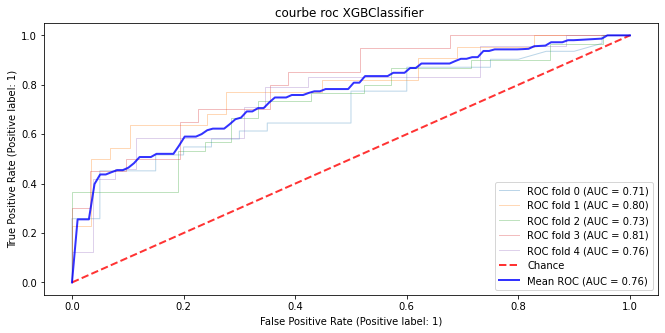

Accuracy: [0.62745098 0.64705882 0.70588235 0.68627451 0.72      ]
moy_accuracy: 0.68
precision: [0.75       0.56666667 0.75862069 0.57692308 0.67857143]
moy_precision: 0.67
sensibilité : [0.58064516 0.77272727 0.73333333 0.75       0.79166667]
moy_sensibilité: 0.73
spécificité : [0.7        0.55172414 0.66666667 0.64516129 0.65384615]
moy_spécificité: 0.64
MCC : [0.27451489 0.32650492 0.39748425 0.38593446 0.44839643]
MCC: 0.37
balanced_accuracy : [0.64032258 0.66222571 0.7        0.69758065 0.72275641]
balanced_accuracy: 0.68
roc_auc : [0.71129032 0.79623824 0.72698413 0.80967742 0.75801282]
roc_auc: 0.76
cohen_kappa_scorec : [0.2642369  0.31081081 0.39716312 0.37519142 0.44267516]
cohen_kappa_scorec: 0.36
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

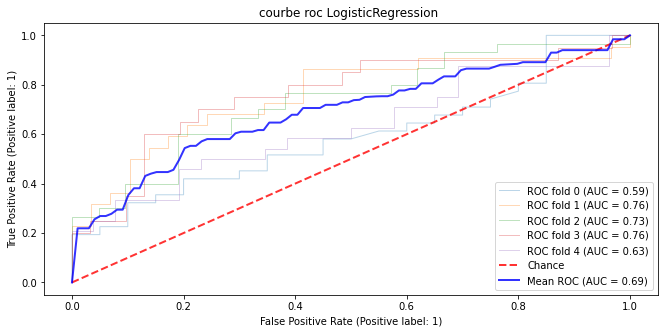

Accuracy: [0.54901961 0.68627451 0.70588235 0.7254902  0.6       ]
moy_accuracy: 0.65
precision: [0.68181818 0.59375    0.75862069 0.66666667 0.58333333]
moy_precision: 0.66
sensibilité : [0.48387097 0.86363636 0.73333333 0.6        0.58333333]
moy_sensibilité: 0.65
spécificité : [0.65       0.55172414 0.66666667 0.80645161 0.61538462]
moy_spécificité: 0.66
MCC : [0.13196899 0.4254845  0.39748425 0.41525175 0.19871795]
MCC: 0.31
balanced_accuracy : [0.56693548 0.70768025 0.7        0.70322581 0.59935897]
balanced_accuracy: 0.66
roc_auc : [0.59193548 0.75548589 0.73174603 0.76774194 0.62339744]
roc_auc: 0.69
cohen_kappa_scorec : [0.12397311 0.39375929 0.39716312 0.4137931  0.19871795]
cohen_kappa_scorec: 0.31
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

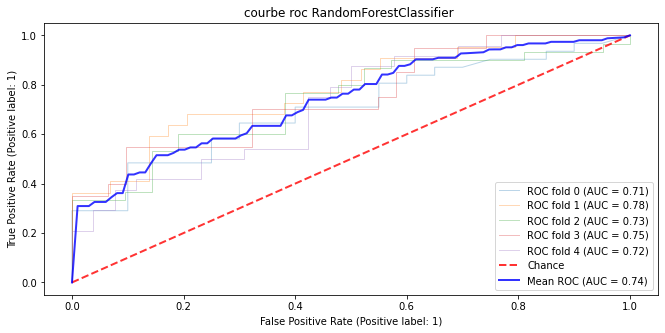

Accuracy: [0.64705882 0.64705882 0.66666667 0.68627451 0.58      ]
moy_accuracy: 0.65
precision: [0.88235294 0.56666667 0.7826087  0.58333333 0.56521739]
moy_precision: 0.68
sensibilité : [0.48387097 0.77272727 0.6        0.7        0.54166667]
moy_sensibilité: 0.62
spécificité : [0.9        0.55172414 0.76190476 0.67741935 0.61538462]
moy_spécificité: 0.70
MCC : [0.39757328 0.32650492 0.3579494  0.36917519 0.15743018]
MCC: 0.32
balanced_accuracy : [0.69193548 0.66222571 0.68095238 0.68870968 0.57852564]
balanced_accuracy: 0.66
roc_auc : [0.70645161 0.78056426 0.73492063 0.75       0.71955128]
roc_auc: 0.74
cohen_kappa_scorec : [0.34146341 0.31081081 0.3446712  0.36448598 0.15730337]
cohen_kappa_scorec: 0.30
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

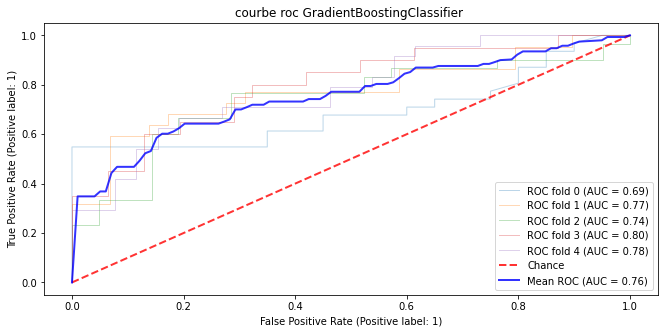

Accuracy: [0.70588235 0.66666667 0.7254902  0.7254902  0.7       ]
moy_accuracy: 0.70
precision: [0.94444444 0.5862069  0.83333333 0.65       0.68      ]
moy_precision: 0.74
sensibilité : [0.5483871  0.77272727 0.66666667 0.65       0.70833333]
moy_sensibilité: 0.67
spécificité : [0.95       0.5862069  0.80952381 0.77419355 0.69230769]
moy_spécificité: 0.76
MCC : [0.50917774 0.35893417 0.46953014 0.42419355 0.40032038]
MCC: 0.43
balanced_accuracy : [0.74919355 0.67946708 0.73809524 0.71209677 0.70032051]
balanced_accuracy: 0.72
roc_auc : [0.69354839 0.77429467 0.73968254 0.7983871  0.77884615]
roc_auc: 0.76
cohen_kappa_scorec : [0.44685466 0.34566038 0.456621   0.42419355 0.4       ]
cohen_kappa_scorec: 0.41
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

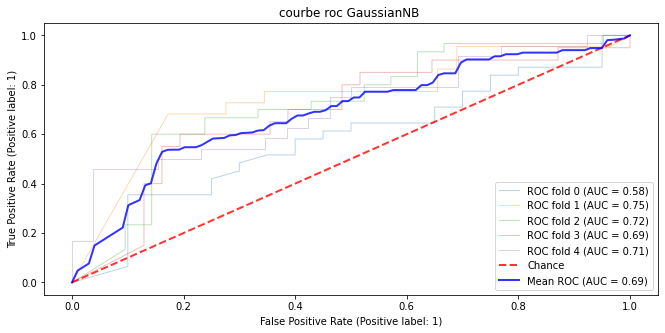

Accuracy: [0.56862745 0.54901961 0.62745098 0.64705882 0.6       ]
moy_accuracy: 0.60
precision: [0.65517241 0.48717949 0.66666667 0.53846154 0.58333333]
moy_precision: 0.59
sensibilité : [0.61290323 0.86363636 0.73333333 0.7        0.58333333]
moy_sensibilité: 0.70
spécificité : [0.5        0.31034483 0.47619048 0.61290323 0.61538462]
moy_spécificité: 0.50
MCC : [0.11129915 0.20313732 0.21577962 0.30559708 0.19871795]
MCC: 0.21
balanced_accuracy : [0.55645161 0.5869906  0.6047619  0.65645161 0.59935897]
balanced_accuracy: 0.60
roc_auc : [0.58225806 0.7460815  0.72063492 0.68709677 0.70833333]
roc_auc: 0.69
cohen_kappa_scorec : [0.11093502 0.15913978 0.21411192 0.29709035 0.19871795]
cohen_kappa_scorec: 0.20
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

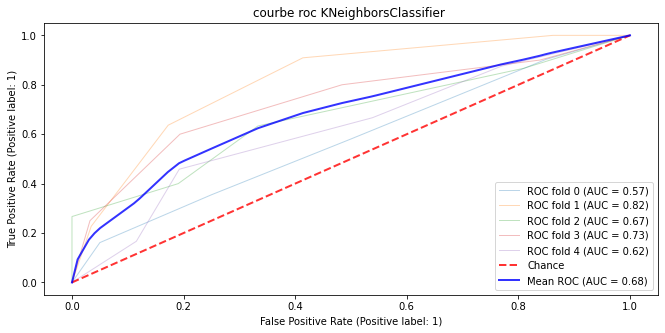

Accuracy: [0.50980392 0.74509804 0.56862745 0.7254902  0.64      ]
moy_accuracy: 0.64
precision: [0.6875     0.73684211 0.75       0.66666667 0.6875    ]
moy_precision: 0.71
sensibilité : [0.35483871 0.63636364 0.4        0.6        0.45833333]
moy_sensibilité: 0.49
spécificité : [0.75       0.82758621 0.80952381 0.80645161 0.80769231]
moy_spécificité: 0.80
MCC : [0.11031219 0.47525816 0.22223356 0.41525175 0.28491568]
MCC: 0.30
balanced_accuracy : [0.55241935 0.73197492 0.6047619  0.70322581 0.63301282]
balanced_accuracy: 0.65
roc_auc : [0.575      0.81583072 0.67222222 0.73064516 0.62259615]
roc_auc: 0.68
cohen_kappa_scorec : [0.09252669 0.47171315 0.19047619 0.4137931  0.26948052]
cohen_kappa_scorec: 0.29
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

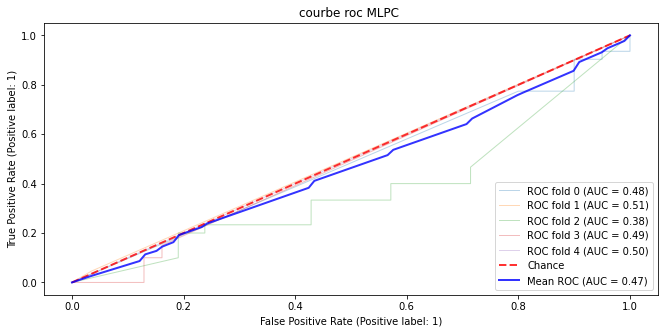

Accuracy: [0.58823529 0.45098039 0.58823529 0.41176471 0.6       ]
moy_accuracy: 0.53
precision: [0.59459459 0.25       1.         0.46341463 0.57894737]
moy_precision: 0.58
sensibilité : [0.         0.45454545 1.         0.         1.        ]
moy_sensibilité: 0.49
spécificité : [1.         0.10344828 0.         0.74193548 0.15384615]
moy_spécificité: 0.40
MCC : [ 0.29552791 -0.24538816  0.03984095  0.07912819 -0.05337605]
MCC: 0.02
balanced_accuracy : [0.48387097 0.53840125 0.39047619 0.5        0.57371795]
balanced_accuracy: 0.50
roc_auc : [0.53225806 0.48589342 0.3547619  0.5        0.7099359 ]
roc_auc: 0.52
cohen_kappa_scorec : [ 0.          0.01485884  0.         -0.00492611  0.11128284]
cohen_kappa_scorec: 0.02
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

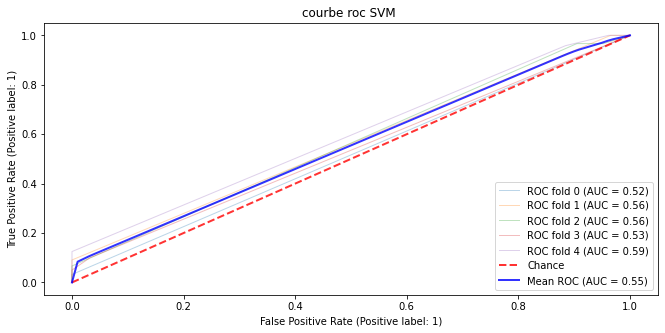

Accuracy: [0.41176471 0.45098039 0.45098039 0.39215686 0.52      ]
moy_accuracy: 0.45
precision: [1.         0.44       1.         0.39215686 0.5       ]
moy_precision: 0.67
sensibilité : [0.03225806 1.         0.06666667 1.         0.95833333]
moy_sensibilité: 0.61
spécificité : [1.         0.03448276 1.         0.         0.11538462]
moy_spécificité: 0.43
MCC : [0.11359237 0.12317635 0.16903085 0.         0.13575525]
MCC: 0.11
balanced_accuracy : [0.51612903 0.51724138 0.53333333 0.5        0.53685897]
balanced_accuracy: 0.52
roc_auc : [0.51612903 0.56112853 0.56031746 0.53467742 0.59294872]
roc_auc: 0.55
cohen_kappa_scorec : [0.02547771 0.0298913  0.05555556 0.         0.07120743]
cohen_kappa_scorec: 0.04


In [23]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe2, Y)):
         clf.fit( x_rfe2.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe2.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe2, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe2, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe2, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe2, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe2, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# RandomForestClassifier

In [24]:
rfecv3 = RFECV(RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),cv=StratifiedKFold(15))
rfecv3.fit(X,Y)
# check the support
rfecv3.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [25]:
# name wise features and count
feature_selected3 =  X.columns[rfecv3.get_support()]
feature_selected3

Index(['X_long', 'Y_lat', 'Bovins', 'Volaille', 'Caprins', 'Ovins', 'Equides',
       'Arbrisseau', 'Pl_herb', 'VegCul',
       ...
       'Vent_Mars', 'Vent_Avril', 'Vent_Mai', 'Vent_Juin', 'Vent_Juill',
       'Vent_Aout', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=198)

In [26]:
 x_rfe3=X[feature_selected3]

In [27]:
 x_rfe3

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Arbrisseau,Pl_herb,VegCul,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_cy_TempJ,Min_TempJ,Max_TempJ,Ph1_TempJ,Ph2_TempJ,Ph3_TempJ,Var_TempJ,Moy_TempN,Amp1_TempN,Amp2_TempN,Amp3_TempN,VarT_ann_TempN,VarT_cy_TempN,...,Tmax_Avril,Tmax_Mai,Tmax_Juin,Tmax_Juill,Tmax_Aout,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,0,0,3340,570,110,50,47,2,49,2690,3950,566,160,231,14905,96,83,7,30,53,14721,15012,672,347,203,6,14436,102,44,5,63,75,...,22.600000,23.200001,24.299999,25.200001,26.200001,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.63,1.72,1.91,2.07,2.18,2.16,2.02,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,0,0,4010,660,10,50,73,0,73,3350,4660,581,33,49,15360,312,126,31,74,87,14941,15609,643,336,88,26,14516,176,55,18,72,80,...,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.50,1.62,1.84,2.03,2.10,2.09,1.95,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,0,0,4010,660,10,50,73,0,73,3350,4660,581,33,49,15360,312,126,31,74,87,14941,15609,643,336,88,26,14516,176,55,18,72,80,...,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.50,1.62,1.84,2.03,2.10,2.09,1.95,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,0,0,3580,590,40,50,48,0,48,2930,4140,600,214,106,15264,306,120,23,74,85,14854,15502,636,335,78,25,14512,160,61,21,66,76,...,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.52,1.64,1.86,2.04,2.12,2.10,1.97,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,0,0,3000,590,70,10,18,0,18,2350,3540,577,185,64,15310,295,115,33,66,77,14918,15560,651,330,92,26,14526,182,58,14,72,79,...,24.700001,25.700001,27.299999,28.700001,29.900000,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.53,1.65,1.88,2.07,2.14,2.13,1.99,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,13,0,39,1390,510,70,20,78,2,80,880,1950,647,153,241,14903,543,78,5,92,94,14387,15505,670,160,325,64,14347,294,40,1,92,94,...,18.900000,21.200001,24.299999,27.200001,27.700001,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.27,1.47,1.74,1.96,2.07,1.93,1.65,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,2050,640,0,10,92,0,92,1400,2690,593,254,146,14838

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

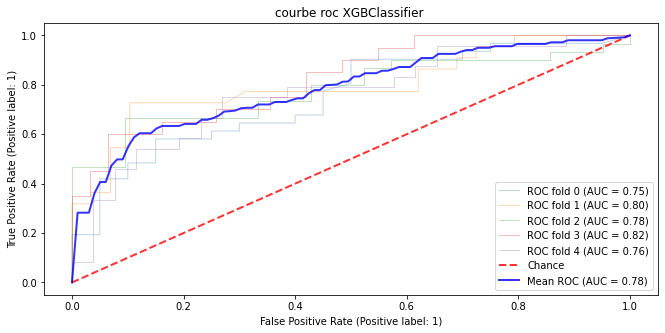

Accuracy: [0.66666667 0.62745098 0.68627451 0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.79166667 0.5483871  0.75       0.58333333 0.61290323]
moy_precision: 0.66
sensibilité : [0.61290323 0.77272727 0.7        0.7        0.79166667]
moy_sensibilité: 0.72
spécificité : [0.75       0.51724138 0.66666667 0.67741935 0.53846154]
moy_spécificité: 0.63
MCC : [0.35497615 0.29414776 0.36265926 0.36917519 0.33979523]
MCC: 0.34
balanced_accuracy : [0.68145161 0.64498433 0.68333333 0.68870968 0.6650641 ]
balanced_accuracy: 0.67
roc_auc : [0.7516129  0.79702194 0.78253968 0.82419355 0.76442308]
roc_auc: 0.78
cohen_kappa_scorec : [0.34168565 0.27632562 0.36150235 0.36448598 0.32646593]
cohen_kappa_scorec: 0.33
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

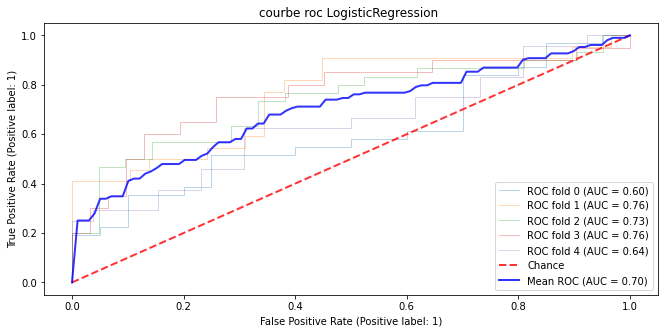

Accuracy: [0.54901961 0.74509804 0.68627451 0.7254902  0.64      ]
moy_accuracy: 0.67
precision: [0.68181818 0.64516129 0.75       0.66666667 0.65      ]
moy_precision: 0.68
sensibilité : [0.48387097 0.90909091 0.7        0.6        0.54166667]
moy_sensibilité: 0.65
spécificité : [0.65       0.62068966 0.66666667 0.80645161 0.73076923]
moy_spécificité: 0.69
MCC : [0.13196899 0.53741591 0.36265926 0.41525175 0.27783119]
MCC: 0.35
balanced_accuracy : [0.56693548 0.76489028 0.68333333 0.70322581 0.63621795]
balanced_accuracy: 0.67
roc_auc : [0.59354839 0.77742947 0.74761905 0.77903226 0.64102564]
roc_auc: 0.71
cohen_kappa_scorec : [0.12397311 0.50485437 0.36150235 0.4137931  0.27419355]
cohen_kappa_scorec: 0.34
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

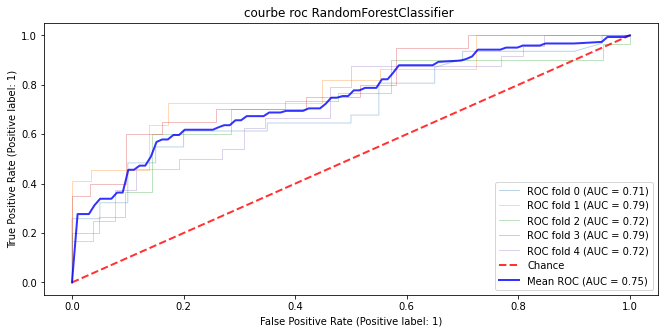

Accuracy: [0.62745098 0.68627451 0.68627451 0.70588235 0.64      ]
moy_accuracy: 0.67
precision: [0.83333333 0.61538462 0.81818182 0.61904762 0.625     ]
moy_precision: 0.70
sensibilité : [0.48387097 0.72727273 0.6        0.65       0.625     ]
moy_sensibilité: 0.62
spécificité : [0.85       0.65517241 0.80952381 0.74193548 0.65384615]
moy_spécificité: 0.74
MCC : [0.34109965 0.37889843 0.40694816 0.38881244 0.27884615]
MCC: 0.36
balanced_accuracy : [0.66693548 0.69122257 0.7047619  0.69596774 0.63942308]
balanced_accuracy: 0.68
roc_auc : [0.71290323 0.79310345 0.72380952 0.78870968 0.71794872]
roc_auc: 0.75
cohen_kappa_scorec : [0.29934924 0.37423313 0.38738739 0.38848921 0.27884615]
cohen_kappa_scorec: 0.35
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

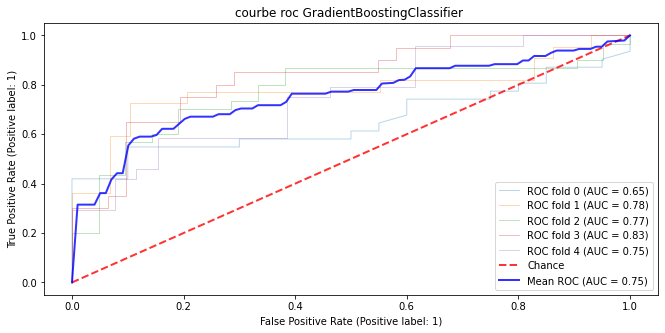

Accuracy: [0.60784314 0.7254902  0.7254902  0.76470588 0.64      ]
moy_accuracy: 0.69
precision: [0.73913043 0.65384615 0.80769231 0.68181818 0.61538462]
moy_precision: 0.70
sensibilité : [0.5483871  0.77272727 0.7        0.75       0.66666667]
moy_sensibilité: 0.69
spécificité : [0.7        0.68965517 0.76190476 0.77419355 0.61538462]
moy_spécificité: 0.71
MCC : [0.24371482 0.45809442 0.45474301 0.51674606 0.28205128]
MCC: 0.39
balanced_accuracy : [0.62419355 0.73119122 0.73095238 0.76209677 0.64102564]
balanced_accuracy: 0.70
roc_auc : [0.65483871 0.77899687 0.76825397 0.83064516 0.74679487]
roc_auc: 0.76
cohen_kappa_scorec : [0.23192771 0.45245399 0.44907407 0.51505547 0.28115016]
cohen_kappa_scorec: 0.39
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

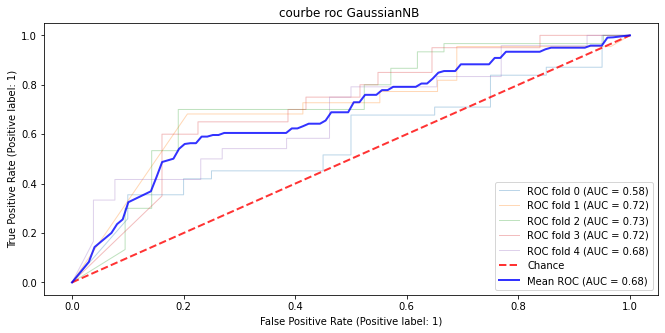

Accuracy: [0.56862745 0.56862745 0.62745098 0.62745098 0.6       ]
moy_accuracy: 0.60
precision: [0.65517241 0.5        0.66666667 0.51851852 0.58333333]
moy_precision: 0.58
sensibilité : [0.61290323 0.90909091 0.73333333 0.7        0.58333333]
moy_sensibilité: 0.71
spécificité : [0.5        0.31034483 0.47619048 0.58064516 0.61538462]
moy_spécificité: 0.50
MCC : [0.11129915 0.26423562 0.21577962 0.27451489 0.19871795]
MCC: 0.21
balanced_accuracy : [0.55645161 0.60971787 0.6047619  0.64032258 0.59935897]
balanced_accuracy: 0.60
roc_auc : [0.57903226 0.71708464 0.72698413 0.72016129 0.67788462]
roc_auc: 0.68
cohen_kappa_scorec : [0.11093502 0.19971469 0.21411192 0.2642369  0.19871795]
cohen_kappa_scorec: 0.20
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

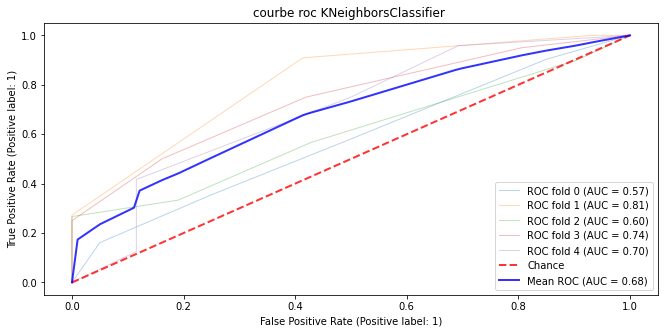

Accuracy: [0.50980392 0.70588235 0.52941176 0.70588235 0.66      ]
moy_accuracy: 0.62
precision: [0.6875     0.68421053 0.71428571 0.66666667 0.76923077]
moy_precision: 0.70
sensibilité : [0.35483871 0.59090909 0.33333333 0.5        0.41666667]
moy_sensibilité: 0.44
spécificité : [0.75       0.79310345 0.80952381 0.83870968 0.88461538]
moy_spécificité: 0.82
MCC : [0.11031219 0.39337246 0.15754599 0.36293309 0.34315712]
MCC: 0.27
balanced_accuracy : [0.55241935 0.69200627 0.57142857 0.66935484 0.65064103]
balanced_accuracy: 0.63
roc_auc : [0.575      0.80721003 0.60396825 0.73951613 0.69711538]
roc_auc: 0.68
cohen_kappa_scorec : [0.09252669 0.39043825 0.12820513 0.35443038 0.30668842]
cohen_kappa_scorec: 0.25
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

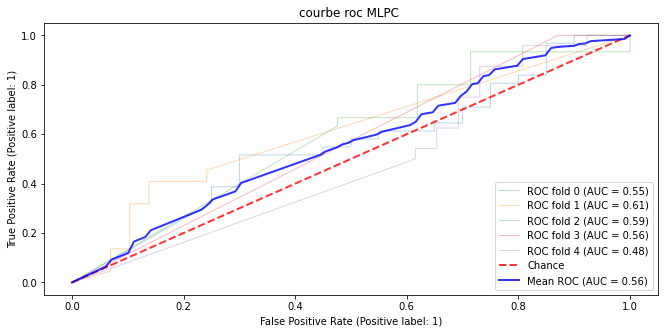

Accuracy: [0.41176471 0.62745098 0.58823529 0.54901961 0.52      ]
moy_accuracy: 0.54
precision: [0.55555556 0.39583333 0.58823529 0.         0.47727273]
moy_precision: 0.40
sensibilité : [0.35483871 0.68181818 0.46666667 0.05       0.41666667]
moy_sensibilité: 0.39
spécificité : [0.5        0.93103448 0.76190476 1.         0.15384615]
moy_spécificité: 0.67
MCC : [-0.01920061  0.18090814 -0.03073796  0.13587201  0.32449893]
MCC: 0.12
balanced_accuracy : [0.47016129 0.63401254 0.52380952 0.4766129  0.60416667]
balanced_accuracy: 0.54
roc_auc : [0.50806452 0.50783699 0.33650794 0.53225806 0.5625    ]
roc_auc: 0.49
cohen_kappa_scorec : [ 0.         -0.01854494  0.19047619 -0.02341137 -0.12540193]
cohen_kappa_scorec: 0.00
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

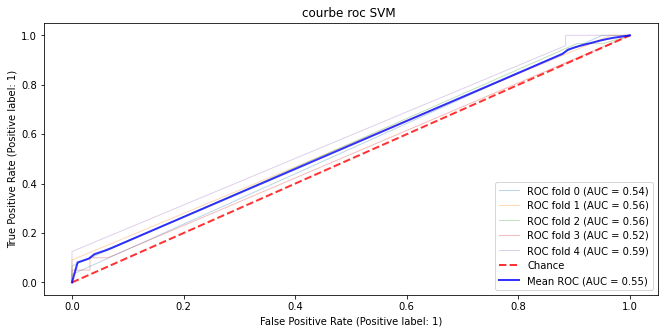

Accuracy: [0.41176471 0.45098039 0.45098039 0.39215686 0.52      ]
moy_accuracy: 0.45
precision: [1.         0.44       1.         0.39215686 0.5       ]
moy_precision: 0.67
sensibilité : [0.03225806 1.         0.06666667 1.         0.95833333]
moy_sensibilité: 0.61
spécificité : [1.         0.03448276 1.         0.         0.11538462]
moy_spécificité: 0.43
MCC : [0.11359237 0.12317635 0.16903085 0.         0.13575525]
MCC: 0.11
balanced_accuracy : [0.51612903 0.51724138 0.53333333 0.5        0.53685897]
balanced_accuracy: 0.52
roc_auc : [0.54032258 0.56112853 0.56031746 0.51935484 0.59455128]
roc_auc: 0.56
cohen_kappa_scorec : [0.02547771 0.0298913  0.05555556 0.         0.07120743]
cohen_kappa_scorec: 0.04


In [28]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe3, Y)):
         clf.fit( x_rfe3.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe3.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe3, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe3, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe3, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe3, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe3, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# GradientBoostingClassifier

In [31]:
rfecv4 = RFECV(GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=1, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),cv=StratifiedKFold(15))
rfecv4.fit(X,Y)
# check the support
rfecv4.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False,  True, False,
        True,  True,

In [32]:
# name wise features and count
feature_selected4 =  X.columns[rfecv4.get_support()]
feature_selected4

Index(['Ovins', 'Equides', 'Arbrisseau', 'Pl_herb', 'ZoneUrbaine', 'Amp2_IRM',
       'Min_IRM', 'Ph1_IRM', 'Amp1_TempJ', 'Max_TempJ', 'Moy_TempN',
       'Amp1_TempN', 'Amp3_TempN', 'Min_TempN', 'Max_TempN', 'Ph3_TempN',
       'VarT_ann_NDVI', 'VarT_bi_NDVI', 'Ph2_NDVI', 'Var_NDVI', 'Moy_EVI',
       'Amp2_EVI', 'Var_EVI', 'ProfAbs_Sub', 'Sol_Carbone_stock', 'Sol_pH_KCL',
       'Sol_Sable', 'Elev_Max', 'Elev_sd', 'Pente_Max', 'Pente_Min',
       'Pente_sd', 'IPT_Max', 'IPT_Med', 'IR_Max', 'IR_Min', 'IR_Moy', 'IR_sd',
       'RV_Med', 'RV_Min', 'Bio_Tmin', 'Bio_Tsec_Moy', 'Bio_Tch_Moy',
       'Bio_Pre_Ann', 'Prec_Oct', 'Rad_Fev', 'Rad_Mars', 'Rad_Mai',
       'Rad_Juill', 'Tmax_Fev', 'Tmax_Mars', 'Tmax_Avril', 'Tmax_Mai',
       'Tmax_Aout', 'Tmax_Oct', 'Tmin_Juin', 'Tmin_Juill', 'Vap_Mars',
       'Vap_Juin', 'Vent_Juin', 'Vent_Juill', 'Vent_Dec'],
      dtype='object')

In [33]:
 x_rfe4=X[feature_selected4]

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

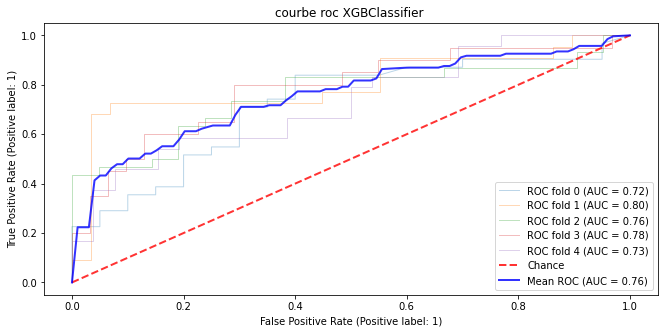

Accuracy: [0.68627451 0.66666667 0.70588235 0.7254902  0.6       ]
moy_accuracy: 0.68
precision: [0.77777778 0.59259259 0.75862069 0.61538462 0.57142857]
moy_precision: 0.66
sensibilité : [0.67741935 0.72727273 0.73333333 0.8        0.66666667]
moy_sensibilité: 0.72
spécificité : [0.7        0.62068966 0.66666667 0.67741935 0.53846154]
moy_spécificité: 0.64
MCC : [0.36917519 0.34526705 0.39748425 0.46627184 0.20645591]
MCC: 0.36
balanced_accuracy : [0.68870968 0.67398119 0.7        0.73870968 0.6025641 ]
balanced_accuracy: 0.68
roc_auc : [0.71935484 0.80094044 0.75714286 0.78225806 0.72916667]
roc_auc: 0.76
cohen_kappa_scorec : [0.36448598 0.33867277 0.39716312 0.4532925  0.20382166]
cohen_kappa_scorec: 0.35
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

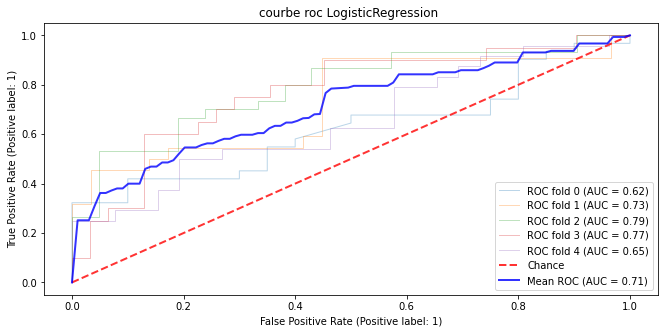

Accuracy: [0.54901961 0.68627451 0.68627451 0.7254902  0.64      ]
moy_accuracy: 0.66
precision: [0.68181818 0.59375    0.75       0.65       0.65      ]
moy_precision: 0.67
sensibilité : [0.48387097 0.86363636 0.7        0.65       0.54166667]
moy_sensibilité: 0.65
spécificité : [0.65       0.55172414 0.66666667 0.77419355 0.73076923]
moy_spécificité: 0.67
MCC : [0.13196899 0.4254845  0.36265926 0.42419355 0.27783119]
MCC: 0.32
balanced_accuracy : [0.56693548 0.70768025 0.68333333 0.71209677 0.63621795]
balanced_accuracy: 0.66
roc_auc : [0.61612903 0.71943574 0.79206349 0.76935484 0.65224359]
roc_auc: 0.71
cohen_kappa_scorec : [0.12397311 0.39375929 0.36150235 0.42419355 0.27419355]
cohen_kappa_scorec: 0.32
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

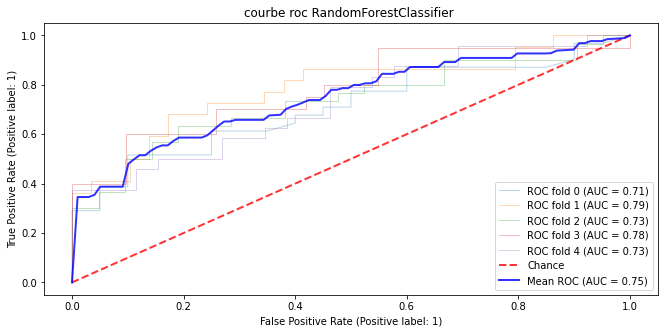

Accuracy: [0.64705882 0.68627451 0.68627451 0.70588235 0.64      ]
moy_accuracy: 0.67
precision: [0.84210526 0.6        0.81818182 0.60869565 0.625     ]
moy_precision: 0.70
sensibilité : [0.51612903 0.81818182 0.6        0.7        0.625     ]
moy_sensibilité: 0.65
spécificité : [0.85       0.5862069  0.80952381 0.70967742 0.65384615]
moy_spécificité: 0.72
MCC : [0.36972449 0.40694816 0.40694816 0.4019712  0.27884615]
MCC: 0.37
balanced_accuracy : [0.68306452 0.70219436 0.7047619  0.70483871 0.63942308]
balanced_accuracy: 0.69
roc_auc : [0.71048387 0.78683386 0.73492063 0.77903226 0.73076923]
roc_auc: 0.75
cohen_kappa_scorec : [0.33090379 0.38738739 0.38738739 0.39905734 0.27884615]
cohen_kappa_scorec: 0.36
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

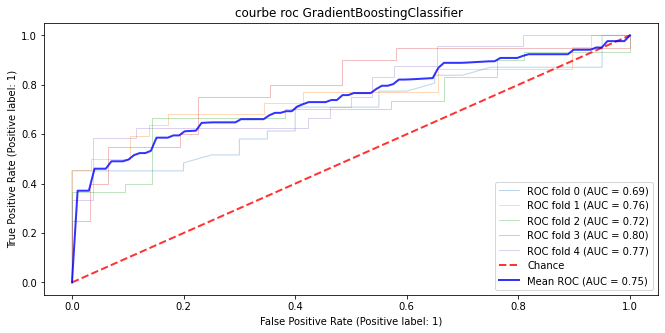

Accuracy: [0.58823529 0.68627451 0.66666667 0.76470588 0.62      ]
moy_accuracy: 0.67
precision: [0.72727273 0.625      0.74074074 0.68181818 0.6       ]
moy_precision: 0.67
sensibilité : [0.51612903 0.68181818 0.66666667 0.75       0.625     ]
moy_sensibilité: 0.65
spécificité : [0.7        0.68965517 0.66666667 0.77419355 0.61538462]
moy_spécificité: 0.69
MCC : [0.21305838 0.3685959  0.3286711  0.51674606 0.24019223]
MCC: 0.33
balanced_accuracy : [0.60806452 0.68573668 0.66666667 0.76209677 0.62019231]
balanced_accuracy: 0.67
roc_auc : [0.69435484 0.75705329 0.71587302 0.79677419 0.77083333]
roc_auc: 0.75
cohen_kappa_scorec : [0.20014937 0.36744186 0.32634033 0.51505547 0.24      ]
cohen_kappa_scorec: 0.33
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

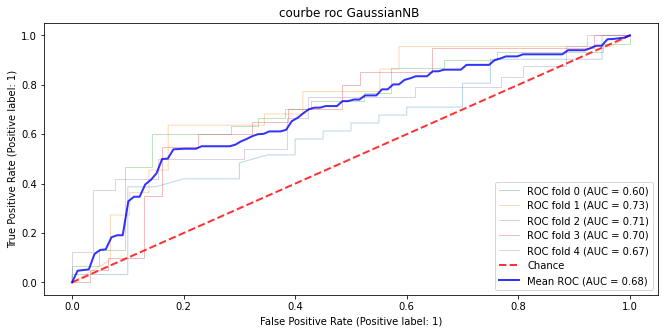

Accuracy: [0.56862745 0.52941176 0.62745098 0.64705882 0.62      ]
moy_accuracy: 0.60
precision: [0.64516129 0.47727273 0.65714286 0.54166667 0.59259259]
moy_precision: 0.58
sensibilité : [0.64516129 0.95454545 0.76666667 0.65       0.66666667]
moy_sensibilité: 0.74
spécificité : [0.45       0.20689655 0.42857143 0.64516129 0.57692308]
moy_spécificité: 0.46
MCC : [0.09516129 0.23235473 0.20708127 0.28871393 0.24417742]
MCC: 0.21
balanced_accuracy : [0.54758065 0.580721   0.59761905 0.64758065 0.62179487]
balanced_accuracy: 0.60
roc_auc : [0.60322581 0.72962382 0.71111111 0.6983871  0.67467949]
roc_auc: 0.68
cohen_kappa_scorec : [0.09516129 0.14405594 0.20246914 0.28504673 0.24242424]
cohen_kappa_scorec: 0.19
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

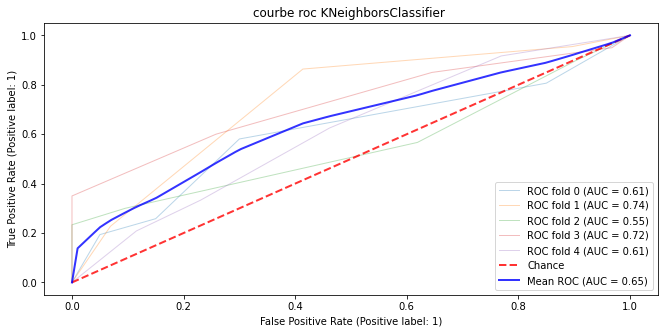

Accuracy: [0.49019608 0.66666667 0.54901961 0.68627451 0.56      ]
moy_accuracy: 0.59
precision: [0.72727273 0.63157895 0.81818182 0.6        0.57142857]
moy_precision: 0.67
sensibilité : [0.25806452 0.54545455 0.3        0.6        0.33333333]
moy_sensibilité: 0.41
spécificité : [0.85       0.75862069 0.9047619  0.74193548 0.76923077]
moy_spécificité: 0.80
MCC : [0.12827813 0.31148677 0.24501524 0.34193548 0.1141228 ]
MCC: 0.23
balanced_accuracy : [0.55403226 0.65203762 0.60238095 0.67096774 0.55128205]
balanced_accuracy: 0.61
roc_auc : [0.60725806 0.73589342 0.55238095 0.725      0.61217949]
roc_auc: 0.65
cohen_kappa_scorec : [0.09178082 0.30916335 0.1802935  0.34193548 0.10423453]
cohen_kappa_scorec: 0.21
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

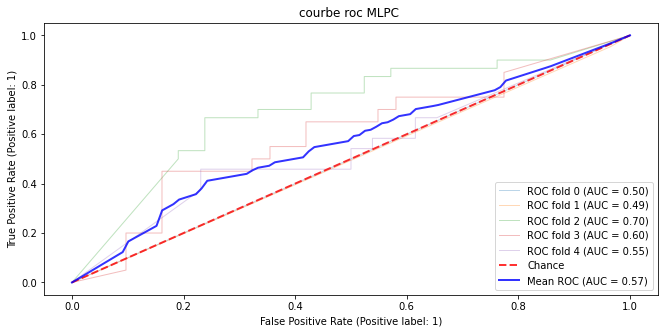

Accuracy: [0.41176471 0.39215686 0.56862745 0.39215686 0.56      ]
moy_accuracy: 0.46
precision: [0.4        0.5        0.46153846 0.4        0.5       ]
moy_precision: 0.45
sensibilité : [0.4516129  0.81818182 0.23333333 0.1        0.54166667]
moy_sensibilité: 0.43
spécificité : [0.9        0.27586207 0.38095238 0.         0.69230769]
moy_spécificité: 0.45
MCC : [-0.07909557 -0.11606963 -0.16903085  0.22586516  0.30692491]
MCC: 0.03
balanced_accuracy : [0.60483871 0.62304075 0.62619048 0.41290323 0.59455128]
balanced_accuracy: 0.57
roc_auc : [0.44677419 0.5815047  0.52857143 0.45403226 0.70032051]
roc_auc: 0.54
cohen_kappa_scorec : [ 0.01162791 -0.12207239 -0.03658537 -0.12707182  0.09240924]
cohen_kappa_scorec: -0.04
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

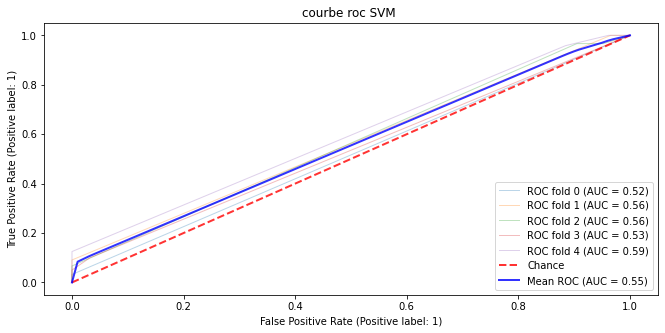

Accuracy: [0.41176471 0.45098039 0.45098039 0.39215686 0.52      ]
moy_accuracy: 0.45
precision: [1.         0.44       1.         0.39215686 0.5       ]
moy_precision: 0.67
sensibilité : [0.03225806 1.         0.06666667 1.         0.95833333]
moy_sensibilité: 0.61
spécificité : [1.         0.03448276 1.         0.         0.11538462]
moy_spécificité: 0.43
MCC : [0.11359237 0.12317635 0.16903085 0.         0.13575525]
MCC: 0.11
balanced_accuracy : [0.51612903 0.51724138 0.53333333 0.5        0.53685897]
balanced_accuracy: 0.52
roc_auc : [0.51612903 0.56112853 0.56031746 0.53467742 0.59294872]
roc_auc: 0.55
cohen_kappa_scorec : [0.02547771 0.0298913  0.05555556 0.         0.07120743]
cohen_kappa_scorec: 0.04


In [34]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe4, Y)):
         clf.fit( x_rfe4.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe4.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe4, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe4, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe4, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe4, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe4, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))